In [61]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

In [136]:
img = cv2.imread('./data/images/train/german shepherd/15.jpg', cv2.IMREAD_GRAYSCALE)

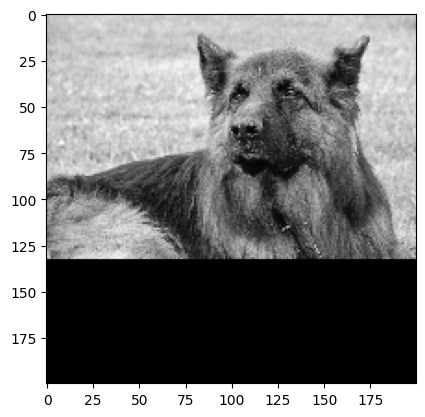

In [137]:
plt.imshow(img, cmap='gray')

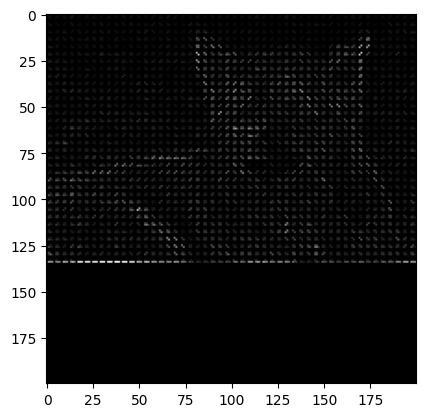

In [138]:
fd, hog_img = hog(img, orientations=9, pixels_per_cell=(4, 4),
               cells_per_block=(2, 2), visualize=True)
plt.imshow(hog_img, cmap='gray')

In [91]:
hog_img.shape

(200, 200)